In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# Reading data

path = "C:/Users/prudh/OneDrive/Desktop/PDS/StudentPerformance/RawData/StudentsPerformance.csv"
data_raw = pd.read_csv(path)

In [3]:
#printing first 5 rows of dataset

data_raw.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#printing no.of rows and columns 

print("No of Rows: {}\nNo of Columns: {}".format(data_raw.shape[0], data_raw.shape[1]))

No of Rows: 1000
No of Columns: 8


In [5]:
#Renaming the column names

Name =   {'race/ethnicity' : 'race',
          'parental level of education' : 'parent_education',
          'test preparation course' : 'test_prep',
          'math score' : 'maths',
          'reading score' : 'reading',
          'writing score' : 'writing'}
data_raw.rename(columns = Name, inplace = True)

data_raw.head()

,gender,race,parent_education,lunch,test_prep,maths,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#check for Null values 

data_raw.isnull().sum()

gender              0
race                0
parent_education    0
lunch               0
test_prep           0
maths               0
reading             0
writing             0
dtype: int64

In [27]:
# Visualization

data_raw['gender'].unique()

array(['female', 'male'], dtype=object)

C:\Users\prudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x720 with 0 Axes>

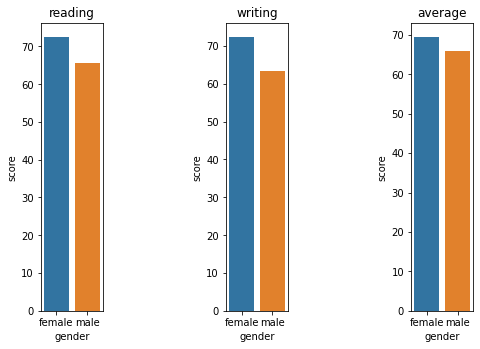

<Figure size 1080x720 with 0 Axes>

In [31]:
#Gender has 2 categories, will see how they perform in maths, reading and writing

fig,p  = plt.subplots()
fig.subplots_adjust( hspace=2, wspace=2, left = 1, right = 2,bottom = 1,top=2)
for x in range(3):
    plt.subplot(1,3, x+1)
    genderresult = data_raw.groupby("gender")[list(data_raw.columns[-3:])[x]].describe()
    sn.barplot(genderresult.index, genderresult.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(data_raw.columns[-3:])[x])
    

plt.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/StudentPerformance/Results/genderimage.jpeg")    

plt.figure(figsize=(15, 10))

In [9]:
# Visualization

#In this, we'll see how good race is in maths, reading and writing

data_raw['race'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [13]:
#Finding average and then  finding which is group is better 

data_raw['average'] = (data_raw.maths + data_raw.reading + data_raw.writing) / 3
data_raw.to_csv('C:/Users/prudh/OneDrive/Desktop/PDS/StudentPerformance/CleanData/clean_data.csv')

In [15]:
data_raw.head()

,gender,race,parent_education,lunch,test_prep,maths,reading,writing,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


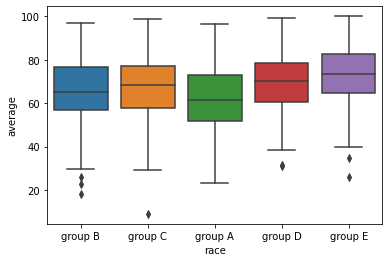

In [16]:
graph = sn.boxplot(data = data_raw, x = 'race', y = 'average')
fig= graph.get_figure()
fig.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/StudentPerformance/Results/groupimage.jpeg")

In [17]:
#Visualization for parental Education

data_raw['parent_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [18]:
data_raw.parent_education.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parent_education, dtype: int64

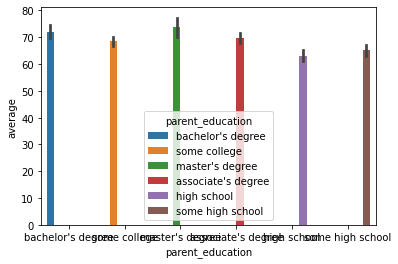

In [19]:
parent_graph= sn.barplot(data = data_raw, x = 'parent_education', y= 'average', hue = 'parent_education')
fig_parent= parent_graph.get_figure()
fig_parent.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/StudentPerformance/Results/parentimage.jpeg")

In [20]:
#Visualization for lunch

data_raw['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [21]:
#find the count

data_raw.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

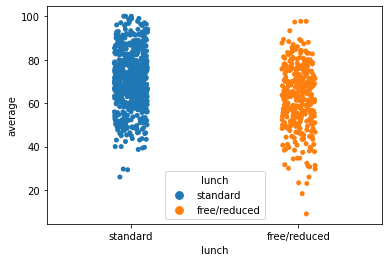

In [22]:
lunch_graph= sn.stripplot(x ='lunch', y= 'average',hue='lunch', data = data_raw)
lunch_fig= lunch_graph.get_figure()
lunch_fig.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/StudentPerformance/Results/lunchimage.jpeg")


In [23]:
#Visualization for test_prep

data_raw['test_prep'].unique()

array(['none', 'completed'], dtype=object)

In [24]:
#find the count

data_raw.test_prep.value_counts()

none         642
completed    358
Name: test_prep, dtype: int64

C:\Users\prudh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


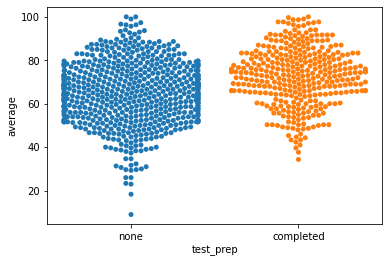

In [25]:
graph_testprep=sn.swarmplot(x ='test_prep', y= 'average', data = data_raw)
fig_testprep=graph_testprep.get_figure()
fig_testprep.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/StudentPerformance/Results/testprep01image.jpeg")

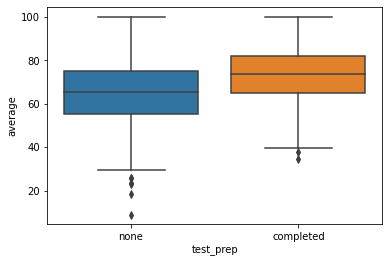

In [26]:
graph_testprep02=sn.boxplot(x ='test_prep', y= 'average', data = data_raw)
fig_testprep02=graph_testprep02.get_figure()
fig_testprep02.savefig("C:/Users/prudh/OneDrive/Desktop/PDS/StudentPerformance/Results/testprep02image.jpeg")
